In [37]:
!pip install requests pandas matplotlib

In [38]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
API_KEY = "69607f83d4cf19076b5db3058ea1197d"

In [40]:
cities = [
    "New York", "London", "Tokyo", "Paris",
    "Mumbai", "Delhi", "Pune", "Nagpur",
    "Bangalore", "Hyderabad", "Chennai", "Kolkata",
    "Ahmedabad", "Jaipur", "Lucknow", "Chandigarh"
]

In [41]:

# Function to get weather data for a city
def get_weather(city):
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}&units=metric"
    res = requests.get(url)

    if res.status_code == 200:
        data = res.json()
        return {
            "City": city,
            "Temperature": data["main"]["temp"],
            "Humidity": data["main"]["humidity"],
            "Weather": data["weather"][0]["description"]
        }
    else:
        print(f"Failed to fetch data for {city}")
        return None

# Retrieve data for all cities
weather_data = [get_weather(city) for city in cities if get_weather(city)]

# Convert to DataFrame
df = pd.DataFrame(weather_data)

# Display the DataFrame
print(df)

# Save data to CSV
df.to_csv("weather_data.csv", index=False)

          City  Temperature  Humidity           Weather
0     New York        -7.95        51         clear sky
1       London         5.77        77   overcast clouds
2        Tokyo         2.97        40         clear sky
3        Paris         7.24        68         clear sky
4       Mumbai        30.99        35             smoke
5        Delhi        26.05        27              haze
6         Pune        33.66        17         clear sky
7       Nagpur        33.01        25              haze
8    Bangalore        31.33        28         clear sky
9    Hyderabad        34.23        24        few clouds
10     Chennai        29.22        68        few clouds
11     Kolkata        24.97        73              haze
12   Ahmedabad        32.02        22             smoke
13      Jaipur        26.62        36  scattered clouds
14     Lucknow        26.99        29              haze
15  Chandigarh        25.10        15     broken clouds


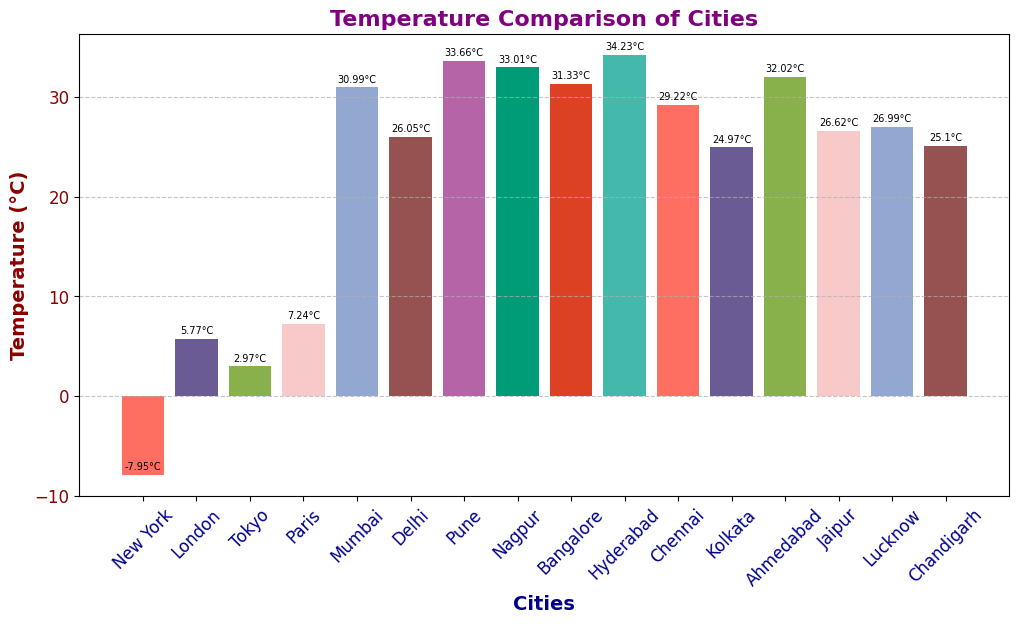

In [42]:
# **Bar Chart Visualization**
plt.figure(figsize=(12, 6))
plt.bar(df["City"], df["Temperature"], color=['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1', '#955251', '#B565A7', '#009B77', '#DD4124', '#45B8AC'])

# **Customization for better visualization**
plt.xlabel("Cities", fontsize=14, fontweight='bold', color="darkblue")
plt.ylabel("Temperature (°C)", fontsize=14, fontweight='bold', color="darkred")
plt.title("Temperature Comparison of Cities", fontsize=16, fontweight='bold', color="purple")
plt.xticks(rotation=45, fontsize=12, color="darkblue")
plt.yticks(fontsize=12, color="darkred")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# **Adding temperature labels on bars**
for i, temp in enumerate(df["Temperature"]):
    plt.text(i, temp + 0.5, f"{temp}°C", ha='center', fontsize=7, color="black")

# Show the plot
plt.show()

In [43]:

# Find the hottest and coldest cities
hottest_city = df.loc[df["Temperature"].idxmax()]
coldest_city = df.loc[df["Temperature"].idxmin()]

print(f"\nHottest City: {hottest_city['City']} with {hottest_city['Temperature']}°C")
print(f"Coldest City: {coldest_city['City']} with {coldest_city['Temperature']}°C")


Hottest City: Hyderabad with 34.23°C
Coldest City: New York with -7.95°C


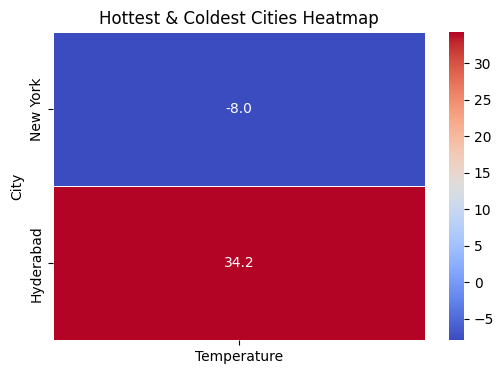

In [44]:
# Select the top  highest and bottom  lowest temperature cities
df_filtered = pd.concat([df.nsmallest(1, "Temperature"), df.nlargest(1, "Temperature")])

# Generate Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_filtered[["Temperature"]].set_index(df_filtered["City"]), cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5)
plt.title("_")
plt.ylabel("City")
plt.show()
